## Задание

Построить графики абсолютной погрешности каждого метода в зависимости от шага численного дифференцирования $h_n = \frac{2}{2^n}, n = \overline{1,21}$ для функций

1. $\sin \left(x^2\right)$
2. $\cos \left(\sin \left(x\right)\right)$
3. $\exp \left(\cos \left(\sin \left(x\right)\right) \right)$
4. $\ln \left(x + 3\right)$
5. $\left(x + 3\right)^{0,5}$

Использовать логарифмический масштаб по обеим осям. Графики погрешности методов для каждой функции строить в отдельном окне.

Список формул аналитического вычисления производных:

$$1. \hspace{0.5cm} \frac{f(x+h) - f(x)}{h}$$

$$2. \hspace{0.5cm} \frac{f(x) - f(x-h)}{h}$$

$$3. \hspace{0.5cm} \frac{f(x+h) - f(x-h)}{2h}$$

$$4. \hspace{0.5cm} \frac{4}{3} \frac{f(x+h) - f(x-h)}{2h} - \frac{1}{3} \frac{f(x+2h) - f(x-2h)}{4h}$$

$$5. \hspace{0.5cm} \frac{3}{2} \frac{f(x+h) - f(x-h)}{2h} - \frac{3}{5} \frac{f(x+2h) - f(x-2h)}{4h} + \frac{1}{10} \frac{f(x+3h) - f(x-3h)}{6h}$$

Для начала импортируем все необходимые библиотеки.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

Далее создадим все необходимые функции, обернув их в class, чтобы не пришлось передавать функцию и ее производную по отдельности.

In [9]:
class func1:
    @staticmethod
    def value(x):
        return np.sin(x ** 2)
    
    @staticmethod
    def derivative(x):
        return 2 * x * np.cos(x ** 2)

class func2:
    @staticmethod
    def value(x):
        return np.cos(np.sin(x))
    
    @staticmethod
    def derivative(x):
        return np.sin(np.sin(x)) * (-np.cos(x))
    
class func3:
    @staticmethod
    def value(x):
        return np.exp(np.cos(np.sin(x)))
    
    @staticmethod
    def derivative(x):
        return np.sin(np.sin(x)) * np.cos(x) * (-np.exp(np.cos(np.sin(x))))
    
class func4:
    @staticmethod
    def value(x):
        return np.log(x + 3)
    
    @staticmethod
    def derivative(x):
        return 1 / (x + 3)
    
class func5:
    @staticmethod
    def value(x):
        return (x + 3) ** 0.5
    
    @staticmethod
    def derivative(x):
        return 1 / (2 * (x + 3) ** 0.5)

Создадим функции для каждого из методов дифференцирования. В параметры будем передавать шаг дифференцирования h, точку, в которой будем дифференцировать и функцию, которую будем дифференцировать.

In [10]:
def derivate1(x, h, function):
    return (function(x + h) - function(x)) / h
    
def derivate2(x, h, function):
    return (function(x) - function(x - h)) / h

def derivate3(x, h, function):
    return (function(x + h) - function(x - h)) / (2 * h)

def derivate4(x, h, function):
    temp1 = (function(x + h) - function(x - h)) / (2 * h)
    temp2 = (function(x + 2*h) - function(x - 2*h)) / (4 * h)
    return 4/3 * temp1 - 1/3 * temp2

def derivate5(x, h, function):
    temp1 = (function(x + h) - function(x - h)) / (2 * h)
    temp2 = (function(x + 2*h) - function(x - 2*h)) / (4 * h)
    temp3 = (function(x + 3*h) - function(x - 3*h)) / (6 * h)
    return 3/2 * temp1 - 3/5 * temp2 + 1/10 * temp3

Создадим функцию `create_plot`, которая будет строить график зависимости ошибки метода от шага дифференцирования для конкретных функции и метода дифференцирования. Делать это она будет по формуле $$Error = f'(x) - g(x, h)$$ где $g$ - функция, обсчитывающая производную некоторым методом. Производить манипуляции будем сразу над массивами `numpy`

Производную, вычисленную аналитическим методом, будем брать из класса функции.

In [11]:
def create_plot(function, derivate, x, plot_color, label):    
    hn = np.array([2 / (2**n) for n in range(1, 22)])
    plt.plot(hn, np.abs(function.derivative(x) - derivate(x, hn, function.value)), color = plot_color, label = label)

Объединим в одну функцию отрисовку графиков для каждого из методов. Данная функция создает график и рисует на нем погрешности для каждого из методов.

In [12]:
def draw_plots(function, x, label):
    plt.figure(figsize=[24, 15])
    plt.title(label, fontsize=34)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('hn', fontsize=20)
    plt.ylabel('Method error', fontsize=20)
    create_plot(function, derivate1, x, 'red', 'First method')
    create_plot(function, derivate2, x, 'green', 'Second method')
    create_plot(function, derivate3, x, 'blue', 'Third method')
    create_plot(function, derivate4, x, 'orange', 'Fourth method')
    create_plot(function, derivate5, x, 'black', 'Fifth method')
    plt.grid()
    plt.legend(prop={"size":20})

Точно так же объединим в одну функцию рисование каждого графика

In [13]:
def execute(x):
    plt.rcParams['font.size'] = '16'
    draw_plots(func1, x, "First function")
    draw_plots(func2, x, "Second function")
    draw_plots(func3, x, "Third function")
    draw_plots(func4, x, "Fourth function")
    draw_plots(func5, x, "Fifth function")

Теперь мы можем вызвать всего одну функцию `execute` с единственным параметром - точка, в которой производим дифференцирование. В нашем случае рассмотрим графики погрешностей в точке $35$

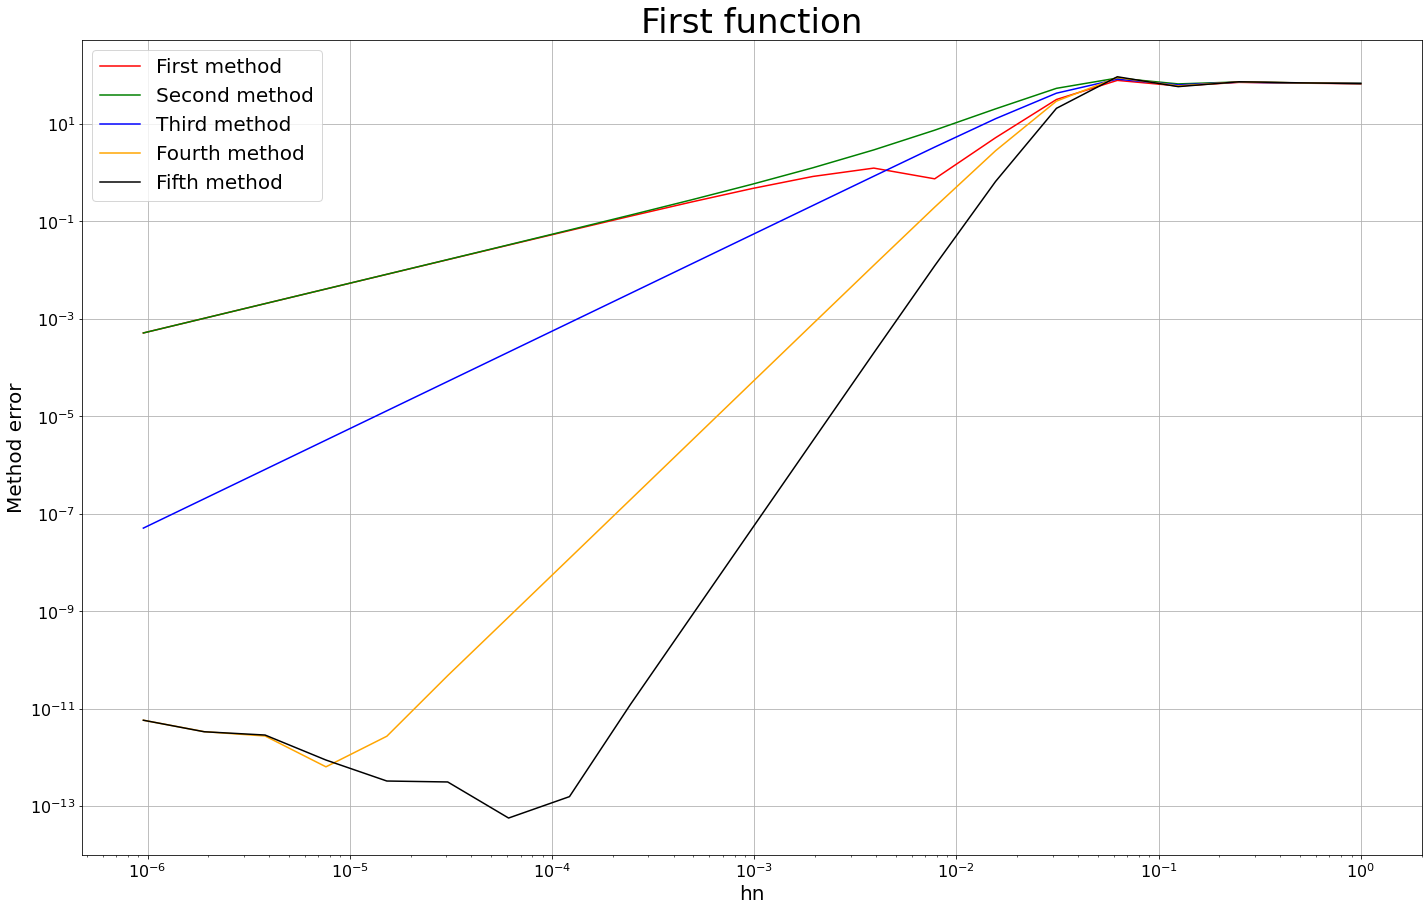

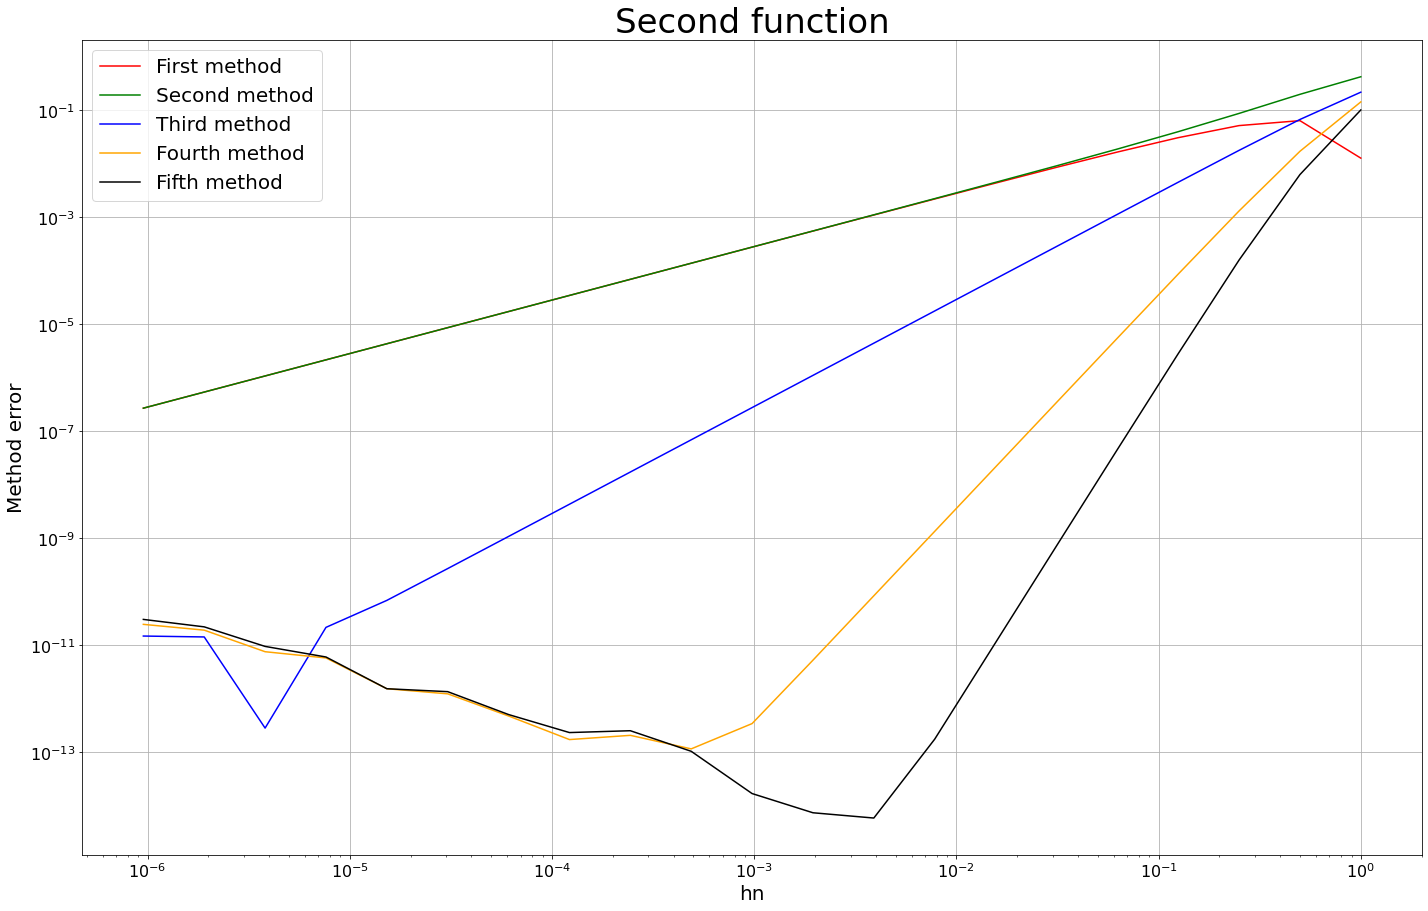

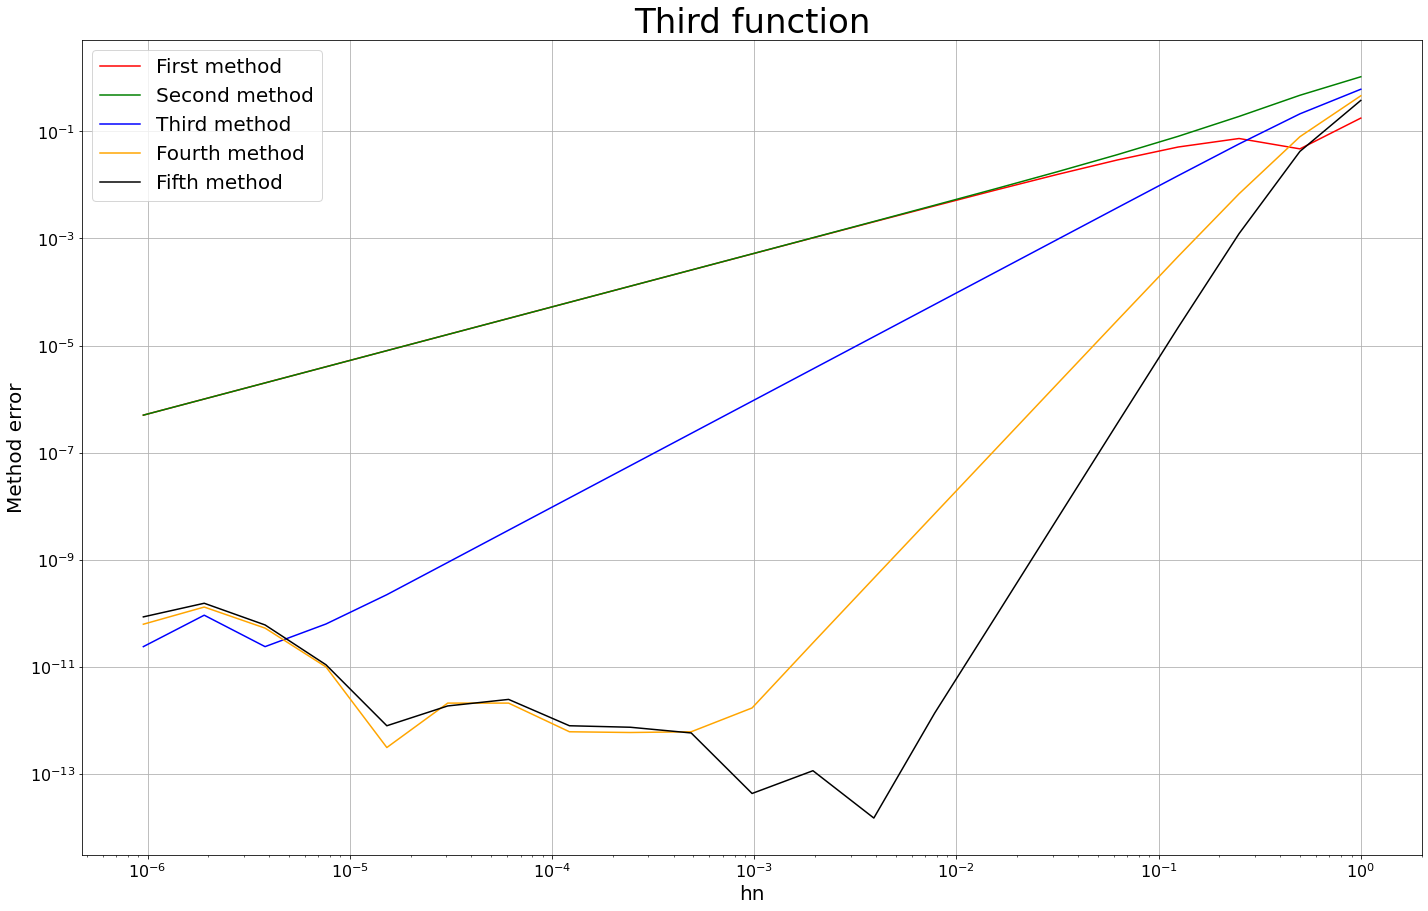

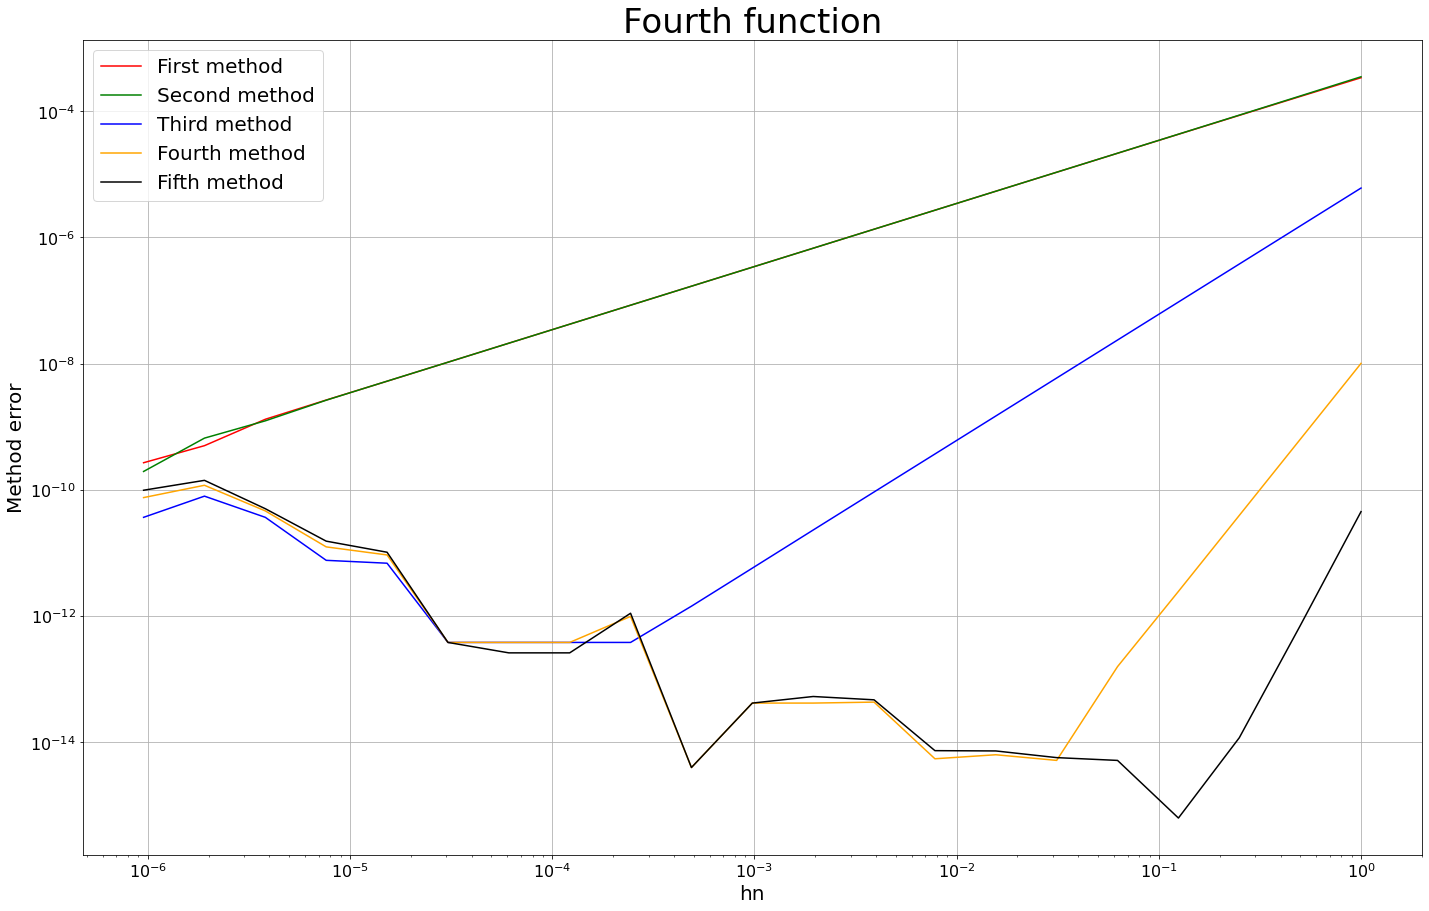

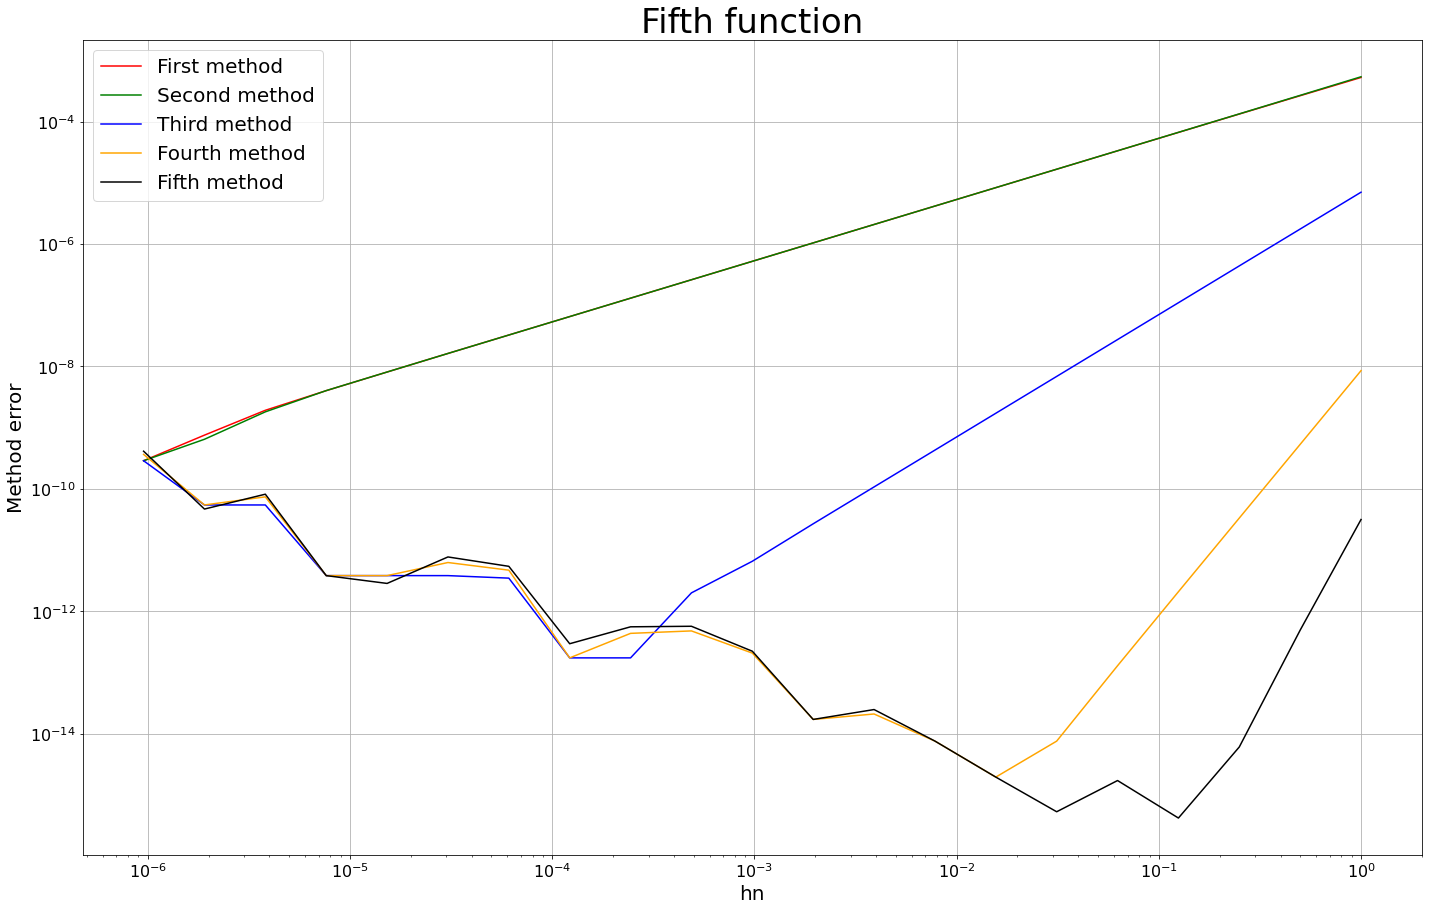

In [14]:
x = 35
execute(x)